<a href="https://colab.research.google.com/github/aneesh1818/AIML_2303A51120/blob/main/lab_8_aiml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml

df = fetch_openml(data_id=21)
df.keys()

print(df['DESCR'])
df['feature_names']
DF = pd.DataFrame(df['data'],columns=df ['feature_names'])

DF.info()

DF.describe()
np.sum(pd.isnull(DF).sum())
df['target']
DF['Car'] = pd.DataFrame(df['target'])
DF.head()
sns.set_style('whitegrid')
sns.countplot(x='Car',data=DF,palette='RdBu_r')
l=list(DF.columns[0:10])
for i in range(len(l)-1):
    sns.boxplot(x='Car',y=l[i], data=DF, palette='winter')
    plt.figure()
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(12,6))
ax1.scatter(DF['safety'],DF['Car'])
ax1.set_title("Car safety",
              fontsize=15)
ax2.scatter(DF['doors'],DF['Car'])
ax2.set_title("Car door",fontsize=15)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(


buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64
       buying maint doors persons lug_boot safety target
count    1728  1728  1728    1728     1728   1728   1728
unique      4     4     4       3        3      3      4
top      high  high     2       2      big   high  unacc
freq      432   432   432     576      576    576   1210


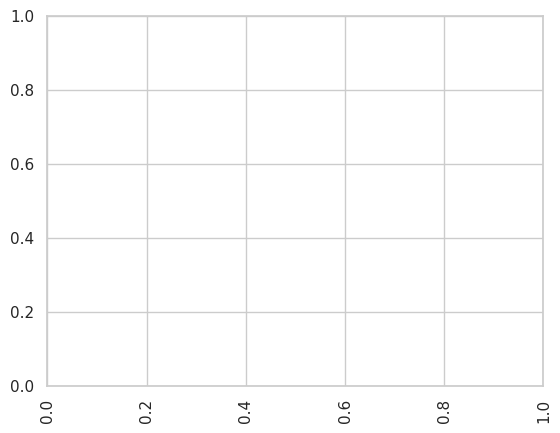

Confusion Matrix:
 [[104   4   7   3]
 [  0  18   0   1]
 [  4   0 354   0]
 [  3   2   0  19]]
Classification Report:
               precision    recall  f1-score   support

         acc       0.94      0.88      0.91       118
        good       0.75      0.95      0.84        19
       unacc       0.98      0.99      0.98       358
       vgood       0.83      0.79      0.81        24

    accuracy                           0.95       519
   macro avg       0.87      0.90      0.88       519
weighted avg       0.96      0.95      0.95       519

Accuracy Score: 0.953757225433526


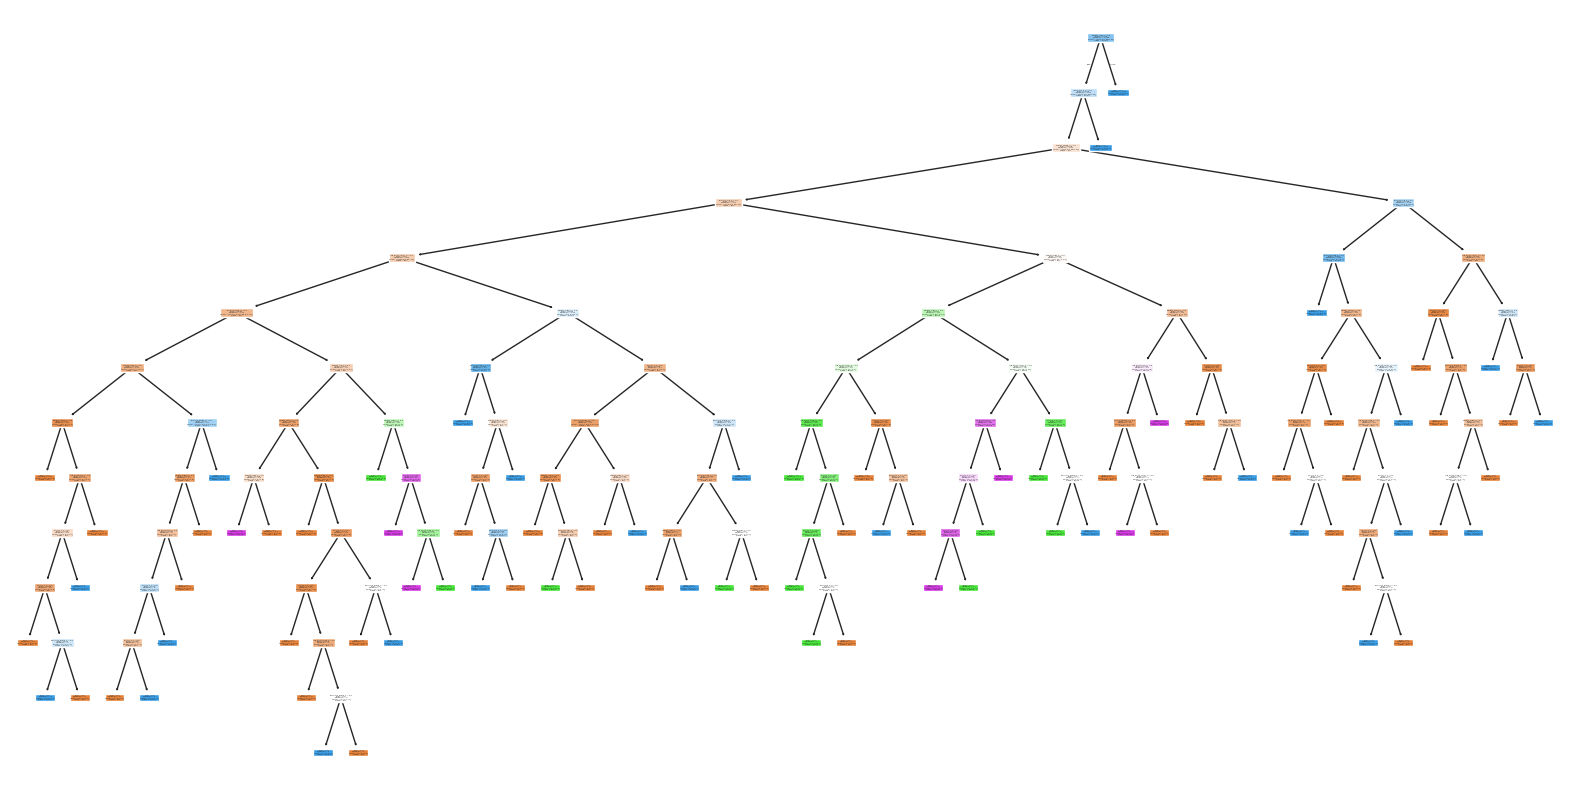

Best Parameters: {'criterion': 'gini', 'max_depth': 12}
Best Score: 0.9627859126916087
Confusion Matrix (Best Model):
 [[105   5   5   3]
 [  1  17   0   1]
 [  3   0 355   0]
 [  3   2   0  19]]
Classification Report (Best Model):
               precision    recall  f1-score   support

         acc       0.94      0.89      0.91       118
        good       0.71      0.89      0.79        19
       unacc       0.99      0.99      0.99       358
       vgood       0.83      0.79      0.81        24

    accuracy                           0.96       519
   macro avg       0.86      0.89      0.88       519
weighted avg       0.96      0.96      0.96       519

Accuracy Score (Best Model): 0.9556840077071291


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.datasets import fetch_openml


car_data = fetch_openml(name='car', version=1)


df = pd.DataFrame(data=car_data.data, columns=car_data.feature_names)
df['target'] = car_data.target


print(df.isnull().sum())


print(df.describe())


sns.boxplot(data=df.iloc[:, :10])
plt.xticks(rotation=90)
plt.show()


X = df.drop('target', axis=1)
y = df['target']


X = pd.get_dummies(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)


print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))


plt.figure(figsize=(20,10))
tree.plot_tree(clf, feature_names=X.columns, class_names=np.unique(y), filled=True)
plt.show()

plt.show()


from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 4, 6, 8, 10, 12]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)


print("Confusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("Accuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))
